# Data Preparation

In [1]:
# loading the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset

data = pd.read_csv("Crop_Data.csv")
data.head()

,N,P,K,ph,crop
0,358.73,12.85,176.25,5.62,arecanut
1,395.28,16.40,188.32,6.11,arecanut
2,361.19,11.33,151.52,5.68,arecanut
3,425.39,19.27,215.04,6.25,arecanut
4,371.52,17.73,147.99,5.96,arecanut


# Data pre processing

In [3]:
data.describe()

,N,P,K,ph
count,119.000000,119.000000,119.000000,119.000000
mean,308.783445,21.927479,220.217479,5.382941
std,76.628734,6.474879,144.426957,0.474376
min,125.400000,10.990000,115.850000,4.350000
25%,262.465000,17.810000,166.055000,4.915000
50%,313.660000,21.250000,208.320000,5.460000
75%,355.515000,24.410000,245.930000,5.750000
max,544.260000,48.730000,1693.890000,6.480000


In [4]:
data.shape

(119, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       119 non-null    float64
 1   P       119 non-null    float64
 2   K       119 non-null    float64
 3   ph      119 non-null    float64
 4   crop    119 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.8+ KB


In [6]:
data

,N,P,K,ph,crop
0,358.73,12.85,176.25,5.62,arecanut
1,395.28,16.40,188.32,6.11,arecanut
2,361.19,11.33,151.52,5.68,arecanut
3,425.39,19.27,215.04,6.25,arecanut
4,371.52,17.73,147.99,5.96,arecanut
...,...,...,...,...,...
114,396.77,17.72,172.25,5.93,rubber
115,359.72,27.55,148.23,6.05,rubber
116,320.63,21.50,233.87,6.14,rubber
117,265.15,22.34,214.15,5.88,rubber


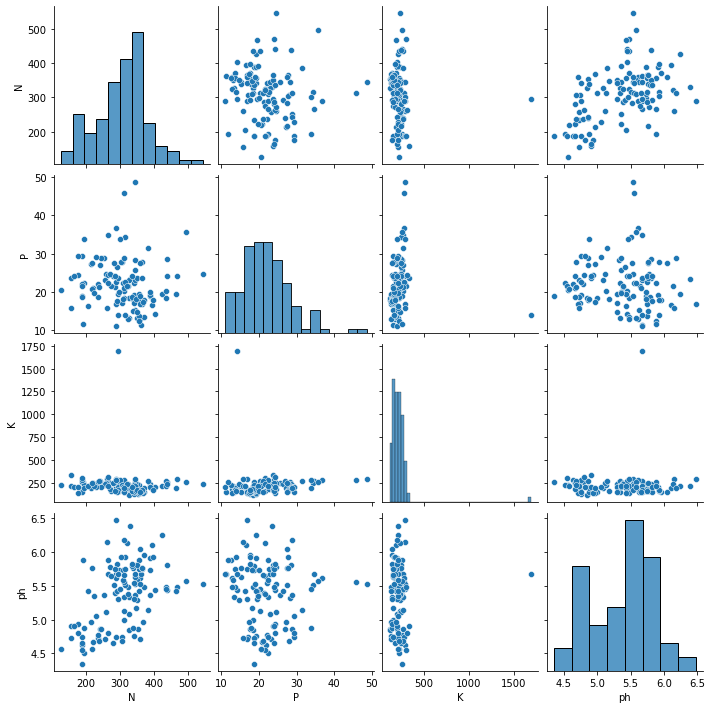

In [7]:
sns.pairplot(data)

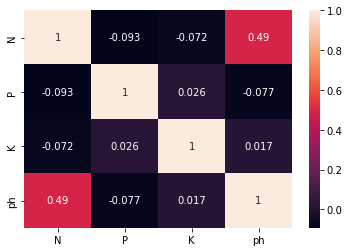

In [8]:
com=data.corr()
sns.heatmap(com,annot=True)

In [9]:
from sklearn import preprocessing 
 
label_encoder = preprocessing.LabelEncoder() 
data['crop']= label_encoder.fit_transform(data['crop'])
data

,N,P,K,ph,crop
0,358.73,12.85,176.25,5.62,0
1,395.28,16.40,188.32,6.11,0
2,361.19,11.33,151.52,5.68,0
3,425.39,19.27,215.04,6.25,0
4,371.52,17.73,147.99,5.96,0
...,...,...,...,...,...
114,396.77,17.72,172.25,5.93,4
115,359.72,27.55,148.23,6.05,4
116,320.63,21.50,233.87,6.14,4
117,265.15,22.34,214.15,5.88,4


In [10]:
x = data.drop(['crop'],axis=1)
y = data['crop']

In [11]:
# splitting the data into train and test

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [12]:
x_train.shape, y_train.shape

((83, 4), (83,))

In [13]:
x_test.shape,y_test.shape

((36, 4), (36,))

In [14]:
# scaling the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

# Model Training and evaluation

## Decision tree

In [15]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [16]:
dtree = DecisionTreeClassifier(random_state=0)
dtree = dtree.fit(x_train, y_train)

In [17]:
d_pred = dtree.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

print(accuracy_score(y_test,d_pred))
print(f1_score(y_test,d_pred,average=None))
print(recall_score(y_test,d_pred,average=None))
print(precision_score(y_test,d_pred,average=None))

0.6388888888888888
[0.66666667 0.55555556 0.8        0.57142857 0.72727273]
[0.57142857 0.5        1.         0.6        0.8       ]
[0.8        0.625      0.66666667 0.54545455 0.66666667]


In [19]:
confusion_matrix(y_test,d_pred)

array([[4, 1, 0, 0, 2],
       [0, 5, 0, 5, 0],
       [0, 0, 4, 0, 0],
       [1, 1, 2, 6, 0],
       [0, 1, 0, 0, 4]], dtype=int64)

## Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=130,criterion='entropy',random_state=0)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=130, random_state=0)

In [21]:
y_pred = rf.predict(x_test)

In [22]:

print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average=None))
print(recall_score(y_test,y_pred,average=None))
print(precision_score(y_test,y_pred,average=None))

0.7777777777777778
[0.66666667 0.73684211 0.85714286 0.8        0.90909091]
[0.71428571 0.7        0.75       0.8        1.        ]
[0.625      0.77777778 1.         0.8        0.83333333]


In [23]:
confusion_matrix(y_test,y_pred)

array([[5, 1, 0, 0, 1],
       [1, 7, 0, 2, 0],
       [1, 0, 3, 0, 0],
       [1, 1, 0, 8, 0],
       [0, 0, 0, 0, 5]], dtype=int64)

## Xgboost classifier

In [24]:
# xgboost

import xgboost as xgb
xg= xgb.XGBClassifier(n_estimators=300,learning_rate=0.05,random_state=0)
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [25]:
xg_pred = xg.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print(accuracy_score(y_test,xg_pred))
print(f1_score(y_test,xg_pred,average=None))
print(recall_score(y_test,xg_pred,average=None))
print(precision_score(y_test,xg_pred,average=None))

0.6944444444444444
[0.71428571 0.7        0.5        0.63157895 0.90909091]
[0.71428571 0.7        0.5        0.6        1.        ]
[0.71428571 0.7        0.5        0.66666667 0.83333333]


In [27]:
confusion_matrix(y_test,xg_pred)

array([[5, 1, 0, 0, 1],
       [1, 7, 0, 2, 0],
       [1, 0, 2, 1, 0],
       [0, 2, 2, 6, 0],
       [0, 0, 0, 0, 5]], dtype=int64)

## Catboost classifier

In [28]:
# catboost

from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=150, 
    learning_rate=0.1, 
)

clf.fit(x_train,y_train)

0:	learn: 1.5487363	total: 150ms	remaining: 22.3s
1:	learn: 1.4769515	total: 155ms	remaining: 11.5s
2:	learn: 1.4148233	total: 160ms	remaining: 7.83s
3:	learn: 1.3415652	total: 164ms	remaining: 5.98s
4:	learn: 1.2799174	total: 167ms	remaining: 4.84s
5:	learn: 1.2303846	total: 170ms	remaining: 4.07s
6:	learn: 1.1794090	total: 172ms	remaining: 3.51s
7:	learn: 1.1316149	total: 173ms	remaining: 3.07s
8:	learn: 1.0925486	total: 174ms	remaining: 2.72s
9:	learn: 1.0487800	total: 175ms	remaining: 2.45s
10:	learn: 1.0081421	total: 176ms	remaining: 2.22s
11:	learn: 0.9715217	total: 177ms	remaining: 2.03s
12:	learn: 0.9451214	total: 178ms	remaining: 1.87s
13:	learn: 0.9136801	total: 179ms	remaining: 1.74s
14:	learn: 0.8754285	total: 180ms	remaining: 1.62s
15:	learn: 0.8412078	total: 181ms	remaining: 1.51s
16:	learn: 0.8155829	total: 182ms	remaining: 1.42s
17:	learn: 0.7872231	total: 183ms	remaining: 1.34s
18:	learn: 0.7673241	total: 184ms	remaining: 1.26s
19:	learn: 0.7443909	total: 185ms	remaini

In [29]:
cat_pred = clf.predict(x_test)

In [30]:
print(accuracy_score(y_test,cat_pred))
print(f1_score(y_test,cat_pred,average=None))
print(recall_score(y_test,cat_pred,average=None))
print(precision_score(y_test,cat_pred,average=None))

0.8333333333333334
[0.76923077 0.73684211 1.         0.85714286 0.90909091]
[0.71428571 0.7        1.         0.9        1.        ]
[0.83333333 0.77777778 1.         0.81818182 0.83333333]


In [31]:
confusion_matrix(y_test,cat_pred)

array([[5, 1, 0, 0, 1],
       [1, 7, 0, 2, 0],
       [0, 0, 4, 0, 0],
       [0, 1, 0, 9, 0],
       [0, 0, 0, 0, 5]], dtype=int64)

## MLP Classifier

In [32]:
from sklearn.neural_network import MLPClassifier
clf2 = MLPClassifier(random_state=1, max_iter=120).fit(x_train_scaled, y_train)

In [33]:
mlp_pred = clf2.predict(x_test_scaled)

In [34]:
print(accuracy_score(y_test,mlp_pred))
print(f1_score(y_test,mlp_pred,average=None))
print(recall_score(y_test,mlp_pred,average=None))
print(precision_score(y_test,mlp_pred,average=None))

0.8055555555555556
[0.71428571 0.77777778 0.75       0.9        0.83333333]
[0.71428571 0.7        0.75       0.9        1.        ]
[0.71428571 0.875      0.75       0.9        0.71428571]


In [35]:
confusion_matrix(y_test,mlp_pred)

array([[5, 0, 0, 0, 2],
       [1, 7, 1, 1, 0],
       [1, 0, 3, 0, 0],
       [0, 1, 0, 9, 0],
       [0, 0, 0, 0, 5]], dtype=int64)

## adaboost classifier

In [36]:
from sklearn.ensemble import AdaBoostClassifier

In [37]:
ada_clf = AdaBoostClassifier(n_estimators=500, random_state=42)
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [38]:
ada_pred = ada_clf.predict(x_test)

In [39]:
print(accuracy_score(y_test,ada_pred))
print(f1_score(y_test,ada_pred,average=None))
print(recall_score(y_test,ada_pred,average=None))
print(precision_score(y_test,ada_pred,average=None))

0.6111111111111112
[0.8        0.52173913 0.66666667 0.7        0.        ]
[0.85714286 0.6        0.75       0.7        0.        ]
[0.75       0.46153846 0.6        0.7        0.        ]


In [40]:
confusion_matrix(y_test,ada_pred)

array([[6, 1, 0, 0, 0],
       [0, 6, 1, 3, 0],
       [1, 0, 3, 0, 0],
       [1, 1, 1, 7, 0],
       [0, 5, 0, 0, 0]], dtype=int64)

# SVM

In [41]:
from sklearn.svm import SVC
linear_svc=SVC(kernel="rbf")

In [42]:
msvc=linear_svc.fit(x_train_scaled,y_train)
svc_pred = msvc.predict(x_test_scaled)

In [43]:
print(accuracy_score(y_test,svc_pred))
print(f1_score(y_test,svc_pred,average=None))
print(recall_score(y_test,svc_pred,average=None))
print(precision_score(y_test,svc_pred,average=None))

0.8333333333333334
[0.71428571 0.81818182 0.85714286 0.88888889 0.90909091]
[0.71428571 0.9        0.75       0.8        1.        ]
[0.71428571 0.75       1.         1.         0.83333333]


# Gradient boosting classifier

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01,random_state=42).fit(x_train, y_train)

In [45]:
gb_pred = gb_clf.predict(x_test)

In [46]:
print(accuracy_score(y_test,gb_pred))
print(f1_score(y_test,gb_pred,average=None))
print(recall_score(y_test,gb_pred,average=None))
print(precision_score(y_test,gb_pred,average=None))

0.6944444444444444
[0.61538462 0.76190476 0.5        0.66666667 0.83333333]
[0.57142857 0.8        0.5        0.6        1.        ]
[0.66666667 0.72727273 0.5        0.75       0.71428571]


# Stacking

In [47]:
base  = [('cat',clf),('svc',msvc),('clf2',clf2)]
meta_learner = xg

In [48]:
from sklearn.ensemble import StackingClassifier
stack_model = StackingClassifier( estimators = base ,final_estimator = meta_learner)
stack_model.fit(x_train,y_train)

0:	learn: 1.5487363	total: 5.45ms	remaining: 813ms
1:	learn: 1.4769515	total: 6.98ms	remaining: 516ms
2:	learn: 1.4148233	total: 8.37ms	remaining: 410ms
3:	learn: 1.3415652	total: 9.58ms	remaining: 350ms
4:	learn: 1.2799174	total: 10.9ms	remaining: 315ms
5:	learn: 1.2303846	total: 12ms	remaining: 288ms
6:	learn: 1.1794090	total: 13.1ms	remaining: 268ms
7:	learn: 1.1316149	total: 14.6ms	remaining: 259ms
8:	learn: 1.0925486	total: 15.8ms	remaining: 247ms
9:	learn: 1.0487800	total: 17ms	remaining: 239ms
10:	learn: 1.0081421	total: 18.2ms	remaining: 230ms
11:	learn: 0.9715217	total: 19.6ms	remaining: 226ms
12:	learn: 0.9451214	total: 21ms	remaining: 222ms
13:	learn: 0.9136801	total: 22.2ms	remaining: 216ms
14:	learn: 0.8754285	total: 23.8ms	remaining: 215ms
15:	learn: 0.8412078	total: 25.2ms	remaining: 211ms
16:	learn: 0.8155829	total: 26.4ms	remaining: 206ms
17:	learn: 0.7872231	total: 27.6ms	remaining: 202ms
18:	learn: 0.7673241	total: 28.6ms	remaining: 197ms
19:	learn: 0.7443909	total: 

0:	learn: 1.5382191	total: 4.29ms	remaining: 639ms
1:	learn: 1.4661403	total: 8.25ms	remaining: 610ms
2:	learn: 1.4105389	total: 12.3ms	remaining: 603ms
3:	learn: 1.3595282	total: 16.3ms	remaining: 596ms
4:	learn: 1.3038023	total: 20.1ms	remaining: 582ms
5:	learn: 1.2413347	total: 24ms	remaining: 576ms
6:	learn: 1.1813855	total: 27.9ms	remaining: 571ms
7:	learn: 1.1375453	total: 32ms	remaining: 567ms
8:	learn: 1.1040456	total: 34.8ms	remaining: 544ms
9:	learn: 1.0632618	total: 37.4ms	remaining: 524ms
10:	learn: 1.0234403	total: 39.7ms	remaining: 501ms
11:	learn: 0.9881775	total: 40.6ms	remaining: 467ms
12:	learn: 0.9611651	total: 41.6ms	remaining: 439ms
13:	learn: 0.9233894	total: 42.6ms	remaining: 414ms
14:	learn: 0.8928251	total: 43.6ms	remaining: 392ms
15:	learn: 0.8597433	total: 44.5ms	remaining: 373ms
16:	learn: 0.8265989	total: 45.3ms	remaining: 355ms
17:	learn: 0.8031682	total: 46.1ms	remaining: 338ms
18:	learn: 0.7813607	total: 46.9ms	remaining: 324ms
19:	learn: 0.7560174	total

0:	learn: 1.5420091	total: 4.83ms	remaining: 719ms
1:	learn: 1.4829048	total: 9.4ms	remaining: 696ms
2:	learn: 1.4321790	total: 13.9ms	remaining: 683ms
3:	learn: 1.3741879	total: 18.2ms	remaining: 665ms
4:	learn: 1.3214725	total: 22.7ms	remaining: 659ms
5:	learn: 1.2742947	total: 27.4ms	remaining: 659ms
6:	learn: 1.2273853	total: 31.9ms	remaining: 651ms
7:	learn: 1.1755875	total: 36.4ms	remaining: 647ms
8:	learn: 1.1402422	total: 40.8ms	remaining: 640ms
9:	learn: 1.1008612	total: 44.1ms	remaining: 617ms
10:	learn: 1.0603530	total: 47ms	remaining: 595ms
11:	learn: 1.0226584	total: 49.5ms	remaining: 569ms
12:	learn: 0.9936640	total: 51.9ms	remaining: 547ms
13:	learn: 0.9617078	total: 54ms	remaining: 524ms
14:	learn: 0.9320332	total: 56.1ms	remaining: 505ms
15:	learn: 0.9032091	total: 58.2ms	remaining: 487ms
16:	learn: 0.8728402	total: 60.1ms	remaining: 470ms
17:	learn: 0.8414178	total: 61.8ms	remaining: 453ms
18:	learn: 0.8222057	total: 63.4ms	remaining: 437ms
19:	learn: 0.8018592	total:

139:	learn: 0.1094357	total: 159ms	remaining: 11.4ms
140:	learn: 0.1084536	total: 160ms	remaining: 10.2ms
141:	learn: 0.1072225	total: 161ms	remaining: 9.07ms
142:	learn: 0.1062610	total: 162ms	remaining: 7.94ms
143:	learn: 0.1054173	total: 163ms	remaining: 6.8ms
144:	learn: 0.1045346	total: 164ms	remaining: 5.66ms
145:	learn: 0.1034469	total: 165ms	remaining: 4.52ms
146:	learn: 0.1026393	total: 166ms	remaining: 3.38ms
147:	learn: 0.1017948	total: 167ms	remaining: 2.25ms
148:	learn: 0.1009439	total: 167ms	remaining: 1.12ms
149:	learn: 0.1002097	total: 168ms	remaining: 0us


StackingClassifier(estimators=[('cat',
                                <catboost.core.CatBoostClassifier object at 0x000001423C0C7640>),
                               ('svc', SVC()),
                               ('clf2',
                                MLPClassifier(max_iter=120, random_state=1))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 early_stopping_rounds=None,
                                                 enable_categori...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=300, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 objective='multi:softprob',
                                                 predictor=None, ...))

In [49]:
stack_pred = stack_model.predict(x_test)

In [50]:
print(accuracy_score(y_test,stack_pred))
print(f1_score(y_test,stack_pred,average=None))
print(recall_score(y_test,stack_pred,average=None))
print(precision_score(y_test,stack_pred,average=None))

0.8611111111111112
[0.76923077 0.8        1.         0.9        0.90909091]
[0.71428571 0.8        1.         0.9        1.        ]
[0.83333333 0.8        1.         0.9        0.83333333]


# Pickle file

In [51]:
import pickle
pickle.dump(stack_model,open("crop_predict_model.pkl","wb"))